In [42]:
# IMPORTANDO BILBLIOTECAS
#################################################################################################################

import pandas as pd
import os
import glob
import geopandas
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# import calendar as cal
# import matplotlib.pyplot as plt
# import numpy as np
# import re
# import locale
# import geodatasets
# from openai import OpenAI
# from dateutil.parser import parse
# import datetime


In [43]:
#CONFIGURANDO BIBLIOTECAS
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
# CRIANDO DATAFRAME INICIAL: CRIME
#################################################################################################################

#################################################################################################################
# Caminho para importacao dos arquivos fontes de dados                                                          
#################################################################################################################
crime_data_path = '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Crimes/'

#################################################################################################################
# Criando lista de arquivos Excel                                                     
#################################################################################################################
crime_files_list = glob.glob(crime_data_path + "*.xlsx")
crime_files_merge = []

for crime_file in crime_files_list:

    #################################################################################################################
    # Recuperando nome do arquivo
    #################################################################################################################
    crime_file_name = os.path.basename(crime_file)
    
    #################################################################################################################
    # Primeiro tratamento do nome do arquivo
    #################################################################################################################
    crime_file_name_treated_pre = crime_file_name.replace('-a-','').replace('-', ' ').replace('_', '').replace('.xlsx', '').replace('Incendios', 'Incendio')
    
    #################################################################################################################
    # Segundo tratamento do nome do arquivo
    #################################################################################################################
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    crime_file_name_treated = ''.join(filter(whitelist.__contains__, crime_file_name_treated_pre))

    #################################################################################################################
    # Listando carregamento de arquivo
    #################################################################################################################
    print('#################################################################################################################')
    print('#                                    CARREGANDO ARQUIVOS CRIMES .XLSX                                          #')
    print('#################################################################################################################')
    print('Carregando Arquivo: ' + crime_file_name)
    print('--> Tipo: ' + crime_file_name_treated)
    
    #################################################################################################################
    # Lendo arquivo .xlsx
    #################################################################################################################
    x_df = pd.read_excel(crime_file,parse_dates=True)

    #################################################################################################################
    # Criando Novas Colunas
    #################################################################################################################
    x_df["Dado_Fonte"] = [crime_file_name_treated for _ in range(x_df.shape[0])]
    x_df["Dado_Data_Ano"] = x_df['Data'].dt.year
    x_df["Dado_Data_Mes"] = x_df['Data'].dt.month
    x_df["Dado_Data_DiaDoMes"] = x_df['Data'].dt.day
    x_df["Dado_Data_DiaDaSemana"] = x_df['Data'].dt.strftime('%A')
    x_df["Dado_Municipio"] = (x_df['Município'].str.lower()).str.capitalize()
    # Removendo miligsegundos
    x_df['Hora'] = x_df['Hora'].astype(str).str.split('.').str[0]
    x_df['Hora'] = pd.to_datetime(x_df['Hora'], format='%H:%M:%S')
    x_df['Dado_Hora'] = x_df['Hora'].dt.strftime('%H:%M')
    x_df['Dado_Periodo'] = (x_df['Hora'].dt.hour % 24 + 4) // 4
    x_df['Dado_Periodo'].replace({1: 'Madrugada', 
                                  2: 'Início da Manhã',
                                  3: 'Manhã',
                                  4: 'Tarde',
                                  5: 'Entardecer',
                                  6: 'Noite'}, inplace=True)
    #################################################################################################################
    # x_df.set_index('Dado_Ano')
    #################################################################################################################
    crime_files_merge.append(x_df)

#################################################################################################################
# Concatenando resultados no Dataframe Final
#################################################################################################################
crime_final_df = pd.concat(crime_files_merge)
crime_final_df.fillna('Não informado')


#################################################################################################################
#                                    CARREGANDO ARQUIVOS CRIMES .XLSX                                          #
#################################################################################################################
Carregando Arquivo: Homofobia-e-Transfobia.xlsx
--> Tipo: Homofobia e Transfobia
#################################################################################################################
#                                    CARREGANDO ARQUIVOS CRIMES .XLSX                                          #
#################################################################################################################
Carregando Arquivo: Incendio_2024.xlsx
--> Tipo: Incendio
#################################################################################################################
#                                    CARREGANDO ARQUIVOS CRIMES .

,AIS,Natureza,Município,Local,Data,Hora,Dia da Semana,Identidade de Gênero,Orientação Sexual,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima,Dado_Fonte,Dado_Data_Ano,Dado_Data_Mes,Dado_Data_DiaDoMes,Dado_Data_DiaDaSemana,Dado_Municipio,Dado_Hora,Dado_Periodo,Gênero,Quantidade (Kg),Tipo de Entorpecente,Quantidade,Meio Empregado
0,AIS 02,CONDUTA TRANSFÓBICA,Fortaleza,RESIDENCIA PARTICULAR,2021-06-03,1900-01-01 06:40:00,Quinta,Mulher Trans,Hetero,27,Ensino Fundamental Completo,Não Informada,Homofobia e Transfobia,2021,6,3,Thursday,Fortaleza,06:40,Início da Manhã,Não informado,Não informado,Não informado,Não informado,Não informado
1,AIS 17,CONDUTA HOMOFÓBICA,Cruz,"BAR, RESTAURANTE, ETC",2021-06-04,1900-01-01 16:00:00,Sexta,Homem Cis,Gay,20,Ensino Médio Incompleto,Não Informada,Homofobia e Transfobia,2021,6,4,Friday,Cruz,16:00,Entardecer,Não informado,Não informado,Não informado,Não informado,Não informado
2,AIS Não Identificada (Fortaleza),CONDUTA HOMOFÓBICA,Fortaleza,AMBIENTE VIRTUAL(INTERNET),2021-06-07,1900-01-01 10:00:00,Segunda,Mulher Cis,Lesbica,26,Superior Incompleto,Parda,Homofobia e Transfobia,2021,6,7,Monday,Fortaleza,10:00,Manhã,Não informado,Não informado,Não informado,Não informado,Não informado
3,AIS 02,CONDUTA HOMOFÓBICA,Fortaleza,RESIDENCIA PARTICULAR,2021-06-10,1900-01-01 17:30:00,Quinta,Homem Cis,Bissexual,25,Superior Incompleto,Não Informada,Homofobia e Transfobia,2021,6,10,Thursday,Fortaleza,17:30,Entardecer,Não informado,Não informado,Não informado,Não informado,Não informado
4,AIS 22,CONDUTA HOMOFÓBICA,Catarina,RESIDENCIA PARTICULAR,2021-06-11,1900-01-01 14:30:00,Sexta,Homem Cis,Gay,22,Superior Incompleto,Não Informada,Homofobia e Transfobia,2021,6,11,Friday,Catarina,14:30,Tarde,Não informado,Não informado,Não informado,Não informado,Não informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,AIS 14,Não informado,Sobral,Não informado,2024-04-30,1900-01-01 10:00:00,Terça,Não informado,Não informado,13,Ensino Fundamental Incompleto,Não Informada,Crimes Sexuais,2024,4,30,Tuesday,Sobral,10:00,Manhã,Feminino,Não informado,Não informado,Não informado,Não informado
658,AIS 08,Não informado,Fortaleza,Não informado,2024-04-30,1900-01-01 10:00:00,Terça,Não informado,Não informado,12,Não Informada,Parda,Crimes Sexuais,2024,4,30,Tuesday,Fortaleza,10:00,Manhã,Feminino,Não informado,Não informado,Não informado,Não informado
659,AIS 03,Não informado,Fortaleza,Não informado,2024-04-30,1900-01-01 21:00:00,Terça,Não informado,Não informado,11,Não Alfabetizado,Parda,Crimes Sexuais,2024,4,30,Tuesday,Fortaleza,21:00,Noite,Feminino,Não informado,Não informado,Não informado,Não informado
660,AIS 16,Não informado,Independência,Não informado,2024-04-30,1900-01-01 10:00:00,Terça,Não informado,Não informado,Não Informada,Ensino Fundamental Incompleto,Parda,Crimes Sexuais,2024,4,30,Tuesday,Independência,10:00,Manhã,Feminino,Não informado,Não informado,Não informado,Não informado


In [5]:
# CHECANDO TRATAMENTOS: CRIME
#################################################################################################################
# Tratamento nome do Arquivo
# crime_final_df['Dado_Fonte']
crime_final_df_fontes = pd.DataFrame(list(set(crime_final_df['Dado_Fonte'])))
print(crime_final_df_fontes)

# Tratamento nome dos Municipios
df_municipios = pd.DataFrame(list(set(crime_final_df['Dado_Municipio'])))
print(df_municipios)


                         0
0              Salvamento 
1                    CVLI 
2             Arma de Fogo
3             Entorpecente
4                     CVP 
5                 Incendio
6       Lei Maria da Penha
7                      CVP
8           Crimes Sexuais
9   Homofobia e Transfobia
10                   Furto
11              Salvamento
                           0
0                    Miraima
1                    Tianguá
2                      Choro
3             Senador pompeu
4                     Jardim
..                       ...
216                    Graça
217  Sao goncalo do amarante
218                    Jucás
219                  Massapê
220                   Pacoti

[221 rows x 1 columns]


In [6]:
# CRIANDO DATAFRAME FINAL: CRIME
#################################################################################################################
crime_final_df_result = crime_final_df[['Dado_Fonte','Natureza','Tipo de Entorpecente','Quantidade','Meio Empregado','Local','Dado_Municipio','Dado_Data_Ano','Dado_Data_Mes','Dado_Data_DiaDoMes','Dado_Data_DiaDaSemana','Dado_Periodo','Dado_Hora','Idade da Vítima','Escolaridade da Vítima','Raça da Vítima','Identidade de Gênero']]
crime_final_df_result

,Dado_Fonte,Natureza,Tipo de Entorpecente,Quantidade,Meio Empregado,Local,Dado_Municipio,Dado_Data_Ano,Dado_Data_Mes,Dado_Data_DiaDoMes,Dado_Data_DiaDaSemana,Dado_Periodo,Dado_Hora,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima,Identidade de Gênero
0,Homofobia e Transfobia,CONDUTA TRANSFÓBICA,NaN,NaN,NaN,RESIDENCIA PARTICULAR,Fortaleza,2021,6,3,Thursday,Início da Manhã,06:40,27,Ensino Fundamental Completo,Não Informada,Mulher Trans
1,Homofobia e Transfobia,CONDUTA HOMOFÓBICA,NaN,NaN,NaN,"BAR, RESTAURANTE, ETC",Cruz,2021,6,4,Friday,Entardecer,16:00,20,Ensino Médio Incompleto,Não Informada,Homem Cis
2,Homofobia e Transfobia,CONDUTA HOMOFÓBICA,NaN,NaN,NaN,AMBIENTE VIRTUAL(INTERNET),Fortaleza,2021,6,7,Monday,Manhã,10:00,26,Superior Incompleto,Parda,Mulher Cis
3,Homofobia e Transfobia,CONDUTA HOMOFÓBICA,NaN,NaN,NaN,RESIDENCIA PARTICULAR,Fortaleza,2021,6,10,Thursday,Entardecer,17:30,25,Superior Incompleto,Não Informada,Homem Cis
4,Homofobia e Transfobia,CONDUTA HOMOFÓBICA,NaN,NaN,NaN,RESIDENCIA PARTICULAR,Catarina,2021,6,11,Friday,Tarde,14:30,22,Superior Incompleto,Não Informada,Homem Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Crimes Sexuais,NaN,NaN,NaN,NaN,NaN,Sobral,2024,4,30,Tuesday,Manhã,10:00,13,Ensino Fundamental Incompleto,Não Informada,NaN
658,Crimes Sexuais,NaN,NaN,NaN,NaN,NaN,Fortaleza,2024,4,30,Tuesday,Manhã,10:00,12,Não Informada,Parda,NaN
659,Crimes Sexuais,NaN,NaN,NaN,NaN,NaN,Fortaleza,2024,4,30,Tuesday,Noite,21:00,11,Não Alfabetizado,Parda,NaN
660,Crimes Sexuais,NaN,NaN,NaN,NaN,NaN,Independência,2024,4,30,Tuesday,Manhã,10:00,Não Informada,Ensino Fundamental Incompleto,Parda,NaN


In [7]:
# CRIME: DF AGRUPADOS - MUNICIPIO
#################################################################################################################
crime_final_df_result_gb_municipio = crime_final_df_result.groupby(['Dado_Municipio'])[["Dado_Municipio"]].size().reset_index(name='Contagem')
crime_final_df_result_gb_municipio

,Dado_Municipio,Contagem
0,Abaiara,465
1,Acarape,1768
2,Acarau,77
3,Acaraú,7298
4,Acopiara,3814
...,...,...
216,Varjota,1708
217,Varzea alegre,15
218,Vicosa do ceara,18
219,Viçosa do ceará,3674


In [8]:
# CRIME: DF AGRUPADOS - MUNICIPIO / ANO
#################################################################################################################
crime_final_df_result_gb_municipio_ano = crime_final_df_result.groupby(['Dado_Municipio' , 'Dado_Data_Ano'])[["Dado_Data_Ano"]].size().reset_index(name='Contagem')
crime_final_df_result_gb_municipio_ano

,Dado_Municipio,Dado_Data_Ano,Contagem
0,Abaiara,2009,1
1,Abaiara,2010,5
2,Abaiara,2011,12
3,Abaiara,2012,31
4,Abaiara,2013,29
...,...,...,...
3028,Várzea alegre,2020,280
3029,Várzea alegre,2021,261
3030,Várzea alegre,2022,307
3031,Várzea alegre,2023,276


In [9]:
# CRIME: DF AGRUPADOS - MUNICIPIO / FONTE
#################################################################################################################
crime_final_df_result_gb_municipio_fonte = crime_final_df_result.groupby(['Dado_Municipio' , 'Dado_Fonte'])[["Dado_Fonte"]].size().reset_index(name='Contagem')
# crime_final_df_result_gb_municipio_fonte = crime_final_df_result_gb_municipio_fonte.reset_index()
crime_final_df_result_gb_municipio_fonte


,Dado_Municipio,Dado_Fonte,Contagem
0,Abaiara,Arma de Fogo,58
1,Abaiara,CVLI,19
2,Abaiara,CVP,27
3,Abaiara,Crimes Sexuais,21
4,Abaiara,Entorpecente,27
...,...,...,...
2028,Várzea alegre,Crimes Sexuais,104
2029,Várzea alegre,Entorpecente,278
2030,Várzea alegre,Furto,1443
2031,Várzea alegre,Homofobia e Transfobia,2


In [10]:
# CRIME: DF AGRUPADOS - MUNICIPIO / FONTE / ANO
#################################################################################################################
crime_final_df_result_gb_municipio_fonte_ano = crime_final_df_result.groupby(['Dado_Municipio' , 'Dado_Fonte', 'Dado_Data_Ano'])[["Dado_Fonte"]].size().reset_index(name='Contagem')
# crime_final_df_result_gb_municipio_fonte = crime_final_df_result_gb_municipio_fonte.reset_index()
crime_final_df_result_gb_municipio_fonte_ano

,Dado_Municipio,Dado_Fonte,Dado_Data_Ano,Contagem
0,Abaiara,Arma de Fogo,2012,4
1,Abaiara,Arma de Fogo,2013,1
2,Abaiara,Arma de Fogo,2014,3
3,Abaiara,Arma de Fogo,2015,10
4,Abaiara,Arma de Fogo,2016,11
...,...,...,...,...
19105,Várzea alegre,Lei Maria da Penha,2020,86
19106,Várzea alegre,Lei Maria da Penha,2021,73
19107,Várzea alegre,Lei Maria da Penha,2022,78
19108,Várzea alegre,Lei Maria da Penha,2023,96


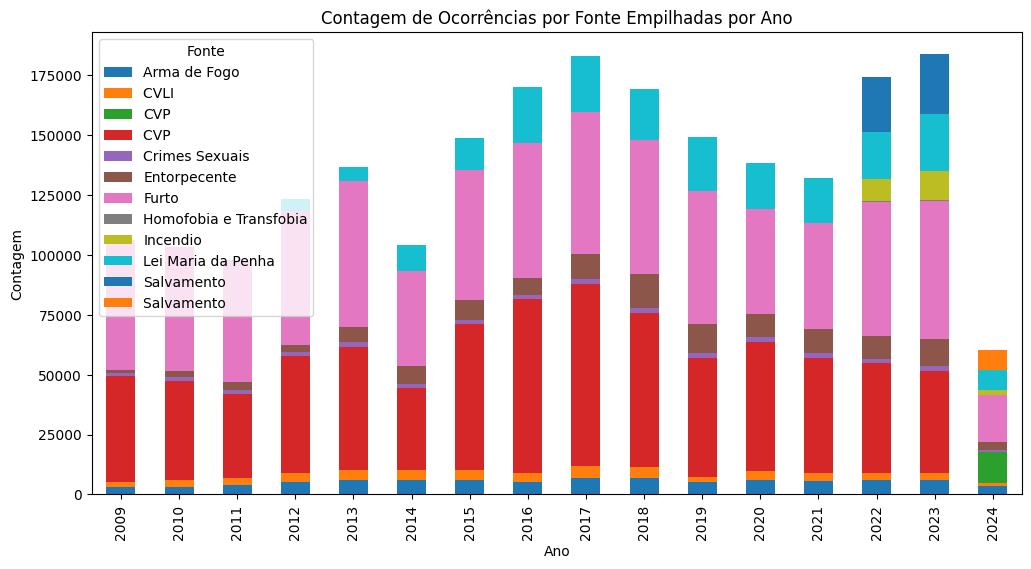

In [21]:
# CRIME: GRAFICO - CRIME / ANO
#################################################################################################################
crime_pivot = crime_final_df_result_gb_municipio_fonte_ano.pivot_table(values='Contagem', index='Dado_Data_Ano', columns='Dado_Fonte', aggfunc='sum', fill_value=0)

crime_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Contagem de Ocorrências por Fonte Empilhadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Fonte')
plt.show()


/var/folders/1y/yb521c0x0db9qm94jf7xdcvh0000gp/T/ipykernel_54705/817983129.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper right', fontsize=12)


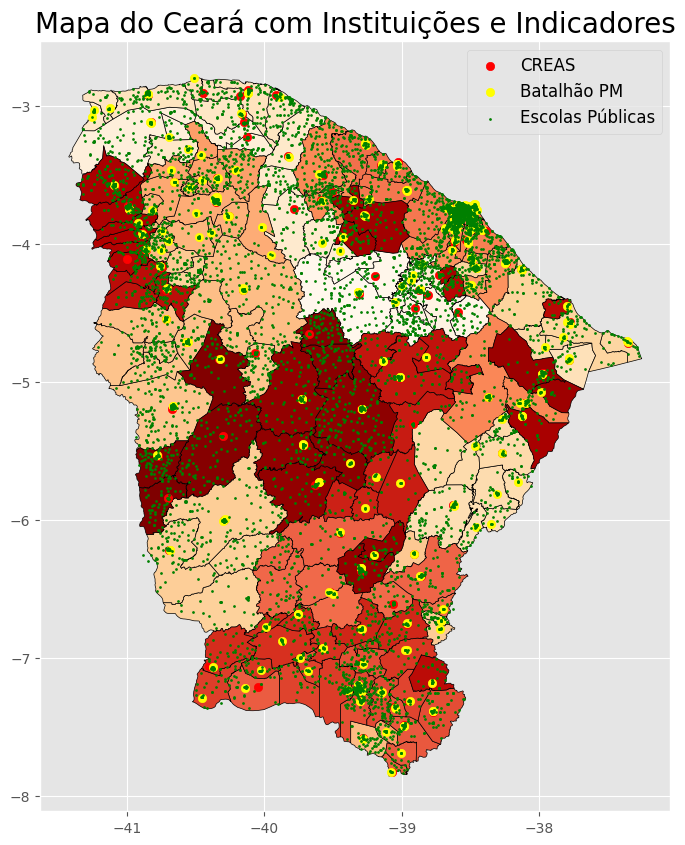

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

# RAW MAPA 
geo_ceara = gpd.read_file('/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Ceara.json')
geo_creas = gpd.read_file('/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/CREAS.json')
geo_bpm = gpd.read_file('/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Batalhão - PM.json')
geo_escpublicas = gpd.read_file('/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Escolas públicas.json')
geo_pobreza = gpd.read_file('/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Extrema pobreza (Nº).json')

# Supondo que crime_final_df_result_gb_municipio esteja previamente carregado no ambiente
geo_ceara = geo_ceara.merge(crime_final_df_result_gb_municipio, left_on='municipio', right_on='Dado_Municipio', how='left')

# Plotando os mapas
ax = geo_ceara.plot(color="lightblue", cmap='OrRd', edgecolor="black", figsize=(20, 10), label='Ceará')
geo_creas.plot(ax=ax, color="red", label='CREAS')
geo_bpm.plot(ax=ax, color="yellow", label='Batalhão PM')
geo_escpublicas.plot(ax=ax, color="green", markersize=2, label='Escolas Públicas')

# Adicionando título
ax.set_title('Mapa do Ceará com Instituições e Indicadores', fontsize=20)

# Adicionando legendas
ax.legend(loc='upper right', fontsize=12)

# Mostrando o gráfico
plt.show()


In [47]:
# Caminho para importação dos arquivos fontes de dados                                                          
geo_data_path = '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/'
print(geo_data_path)

# Criando lista de arquivos JSON
geo_files_list = glob.glob(geo_data_path + "*.json")
print(geo_files_list)

geo_files_merge = []
geo_x_dict = {}

for geo_file in geo_files_list:
    # Recuperando nome do arquivo
    geo_file_name = os.path.basename(geo_file)
    
    # Primeiro tratamento do nome do arquivo
    geo_file_name_treated_pre = geo_file_name.replace('-a-', '').replace('-', ' ').replace('_', ' ').replace('.json', '').replace('Incendios', 'Incendio')
    
    # Segundo tratamento do nome do arquivo
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    geo_file_name_treated = ''.join(filter(whitelist.__contains__, geo_file_name_treated_pre))

    # Listando carregamento de arquivo
    print('#################################################################################################################')
    print('#                                    CARREGANDO ARQUIVOS SOCIAL .JSON                                          #')
    print('#################################################################################################################')
    print('Carregando Arquivo: ' + geo_file_name)
    print('--> Tipo: ' + geo_file_name_treated)
    
    # Lendo arquivo .json
    geo_x_dict[geo_file_name_treated] = geopandas.read_file(geo_file)

# Exibindo os dataframes carregados
for name, df in geo_x_dict.items():
    print(f'Dataframe for {name}:')
    print(df.head())

# Você pode retornar os dataframes em uma lista, se necessário
geo_dataframes = list(geo_x_dict.values())


/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/
['/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Aglomerados_subnormais.json', '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/CREAS.json', '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/ogc_bpm.json', '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Açudes_planejados.json', '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Açudes_monitorados.json', '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/Bacias_hidrograficas.json', '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 

In [ ]:
#TESTE # CRIANDO DATAFRAME INICIAL: DADOS SOCIAIS
#################################################################################################################

#################################################################################################################
# Caminho para importacao dos arquivos fontes de dados JSON                                                    
#################################################################################################################
geo_data_path = '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/'

#################################################################################################################
# Criando lista de arquivos JSON                                                     
#################################################################################################################
geo_files_list = glob.glob(geo_data_path + "*.json")

# geo_files_dict
geo_files_merge = []

for geo_file in geo_files_list:

    print(geo_file)
    geo_file_name = os.path.basename(geo_file)
    print (geo_file_name)
    geo_file_name_noext = os.path.splitext(geo_file_name)[0]
    print (geo_file_name_noext)


In [ ]:
#TESTE OPENAI
client = OpenAI()


In [ ]:
# TESTE GROUPBY
df_gb_municipio = final_df.groupby(["Dado_Municipio"]).count()
df_gb_municipio

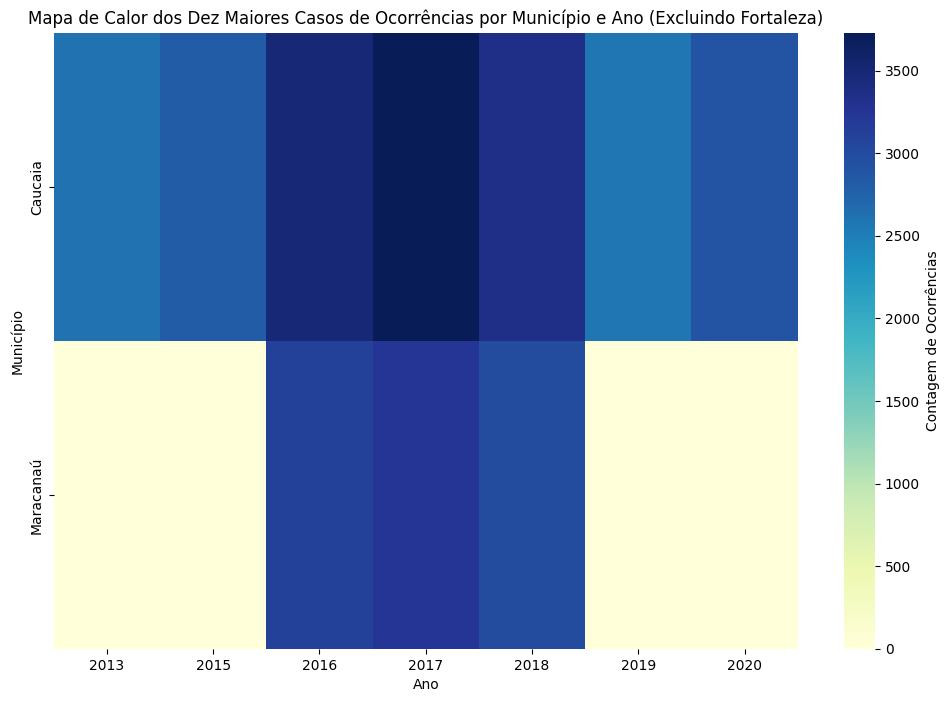

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Filtrar o DataFrame para excluir Fortaleza
crime_filtered = crime_final_df_result_gb_municipio_fonte_ano[crime_final_df_result_gb_municipio_fonte_ano['Dado_Municipio'] != 'Fortaleza']

# Passo 2: Ordenar o DataFrame pelas contagens de ocorrências em ordem decrescente
crime_sorted = crime_filtered.sort_values(by='Contagem', ascending=False)

# Passo 3: Selecionar os dez maiores casos
top_ten_crime = crime_sorted.head(10)

# Passo 4: Criar o mapa de calor com os dados filtrados
plt.figure(figsize=(12, 8))
crime_heatmap = top_ten_crime.pivot_table(
    values='Contagem', 
    index='Dado_Municipio', 
    columns='Dado_Data_Ano', 
    aggfunc='sum', 
    fill_value=0
)
sns.heatmap(crime_heatmap, cmap='YlGnBu', cbar_kws={'label': 'Contagem de Ocorrências'})

# Títulos e rótulos
plt.title('Mapa de Calor dos Dez Maiores Casos de Ocorrências por Município e Ano (Excluindo Fortaleza)')
plt.xlabel('Ano')
plt.ylabel('Município')

# Exibição do gráfico
plt.show()


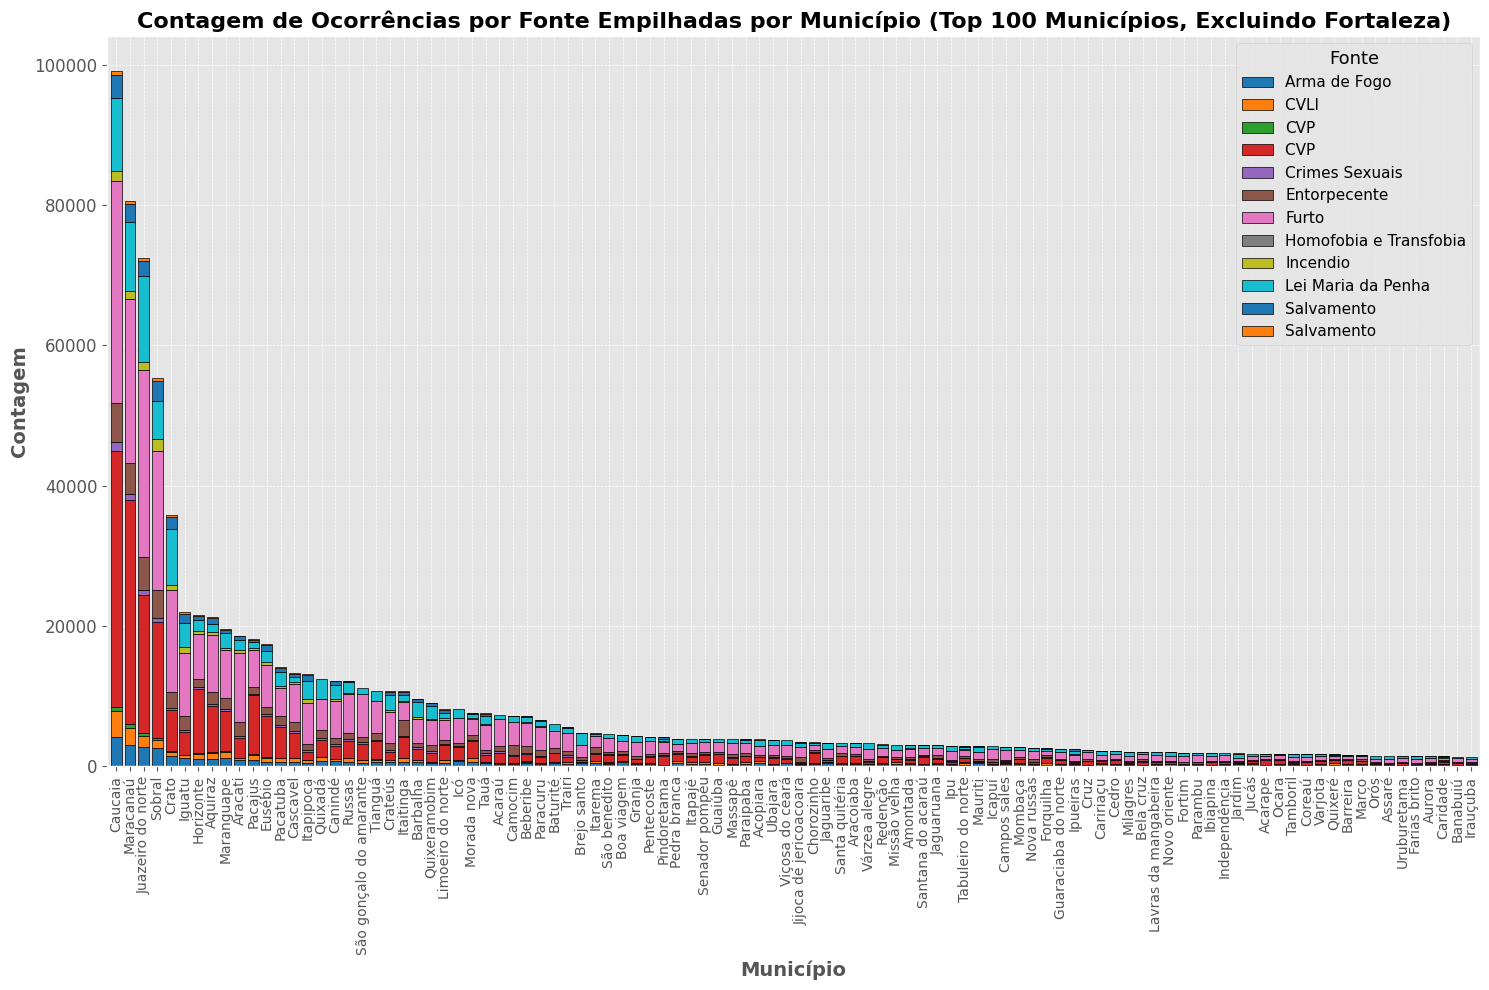

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos gerais
plt.style.use('ggplot')  # Usar um estilo padrão disponível no Matplotlib
sns.set_palette("tab10")

# Passo 1: Filtrar o DataFrame para excluir Fortaleza
crime_filtered = crime_final_df_result_gb_municipio_fonte[crime_final_df_result_gb_municipio_fonte['Dado_Municipio'] != 'Fortaleza']

# Passo 2: Agrupar os dados por município e somar as contagens
municipio_crime_count = crime_filtered.groupby('Dado_Municipio')['Contagem'].sum().reset_index()

# Passo 3: Ordenar os dados por quantidade de crimes em ordem decrescente
municipio_sorted = municipio_crime_count.sort_values(by='Contagem', ascending=False)

# Passo 4: Selecionar os cem municípios com mais crimes
top_hundred_municipios = municipio_sorted.head(100)['Dado_Municipio']

# Passo 5: Filtrar o DataFrame original para esses cem municípios
top_hundred_crime = crime_filtered[crime_filtered['Dado_Municipio'].isin(top_hundred_municipios)]

# Passo 6: Criar o pivot table
crime_pivot = top_hundred_crime.pivot_table(values='Contagem', index='Dado_Municipio', columns='Dado_Fonte', aggfunc='sum', fill_value=0)

# Passo 7: Ordenar os índices do pivot table para que as cidades com mais crimes estejam à esquerda
crime_pivot = crime_pivot.loc[top_hundred_municipios]

# Passo 8: Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(15, 10))
crime_pivot.plot(kind='bar', stacked=True, width=0.8, edgecolor='black', ax=ax)

# Títulos e rótulos
ax.set_title('Contagem de Ocorrências por Fonte Empilhadas por Município (Top 100 Municípios, Excluindo Fortaleza)', fontsize=16, weight='bold')
ax.set_xlabel('Município', fontsize=14, weight='bold')
ax.set_ylabel('Contagem', fontsize=14, weight='bold')
ax.legend(title='Fonte', title_fontsize='13', fontsize='11')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
ax.yaxis.set_tick_params(labelsize=12)

# Adicionar uma grade no fundo
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar layout para que não corte nada
plt.tight_layout()

# Exibir o gráfico
plt.show()


KeyError: 'quantidade_crimes'

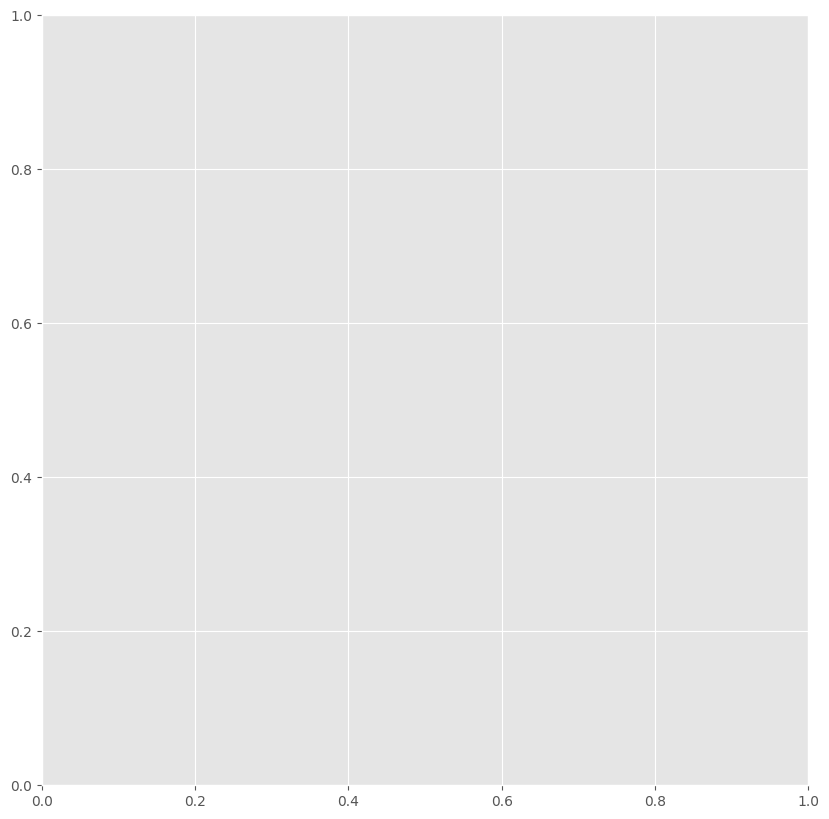

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Caminho para a pasta que contém os arquivos JSON
folder_path = '/Users/thiagom/Documents/Coding/VSCodeRoot/Faculdade/ARA0168 - Tópicos de Big Data em Python/Exploring/data/Maps/'

# Lista para armazenar os GeoDataFrames
geo_dfs = []

# Iterar sobre todos os arquivos na pasta
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        # Ler o arquivo GeoJSON
        geo_df = gpd.read_file(os.path.join(folder_path, filename))
        
        # Adicionar o nome do arquivo (sem caminho e extensão) como legenda
        geo_df['legend'] = os.path.splitext(filename)[0]
        
        geo_dfs.append(geo_df)

# Ler o dataframe de crimes (ajuste o caminho conforme necessário)
# crime_final_df_result_gb_municipio = ...  # Adicione o código para ler seu dataframe de crimes

# Unir os dados de crimes com o GeoDataFrame do Ceará
geo_ceara = next(df for df in geo_dfs if df['legend'].iloc[0] == 'Ceara')
geo_ceara = geo_ceara.merge(crime_final_df_result_gb_municipio, left_on='municipio', right_on='Dado_Municipio', how='left')

# Plotar o mapa com o gráfico de calor
ax = geo_ceara.plot(column='quantidade_crimes', cmap='OrRd', edgecolor='blue', figsize=(20, 10), legend=True)

# Plotar os demais GeoDataFrames
for geo_df in geo_dfs:
    if geo_df['legend'].iloc[0] != 'Ceara':  # Já plotamos o Ceará acima
        geo_df.plot(ax=ax, label=geo_df['legend'].iloc[0])

# Adicionar a legenda
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))  # Remover duplicatas
ax.legend(handles[:len(unique_labels)], unique_labels)

plt.show()
